### The Robot World
A robot, much like you, perceives the world through its "senses." For example, self-driving cars use video, radar, and Lidar, to observe the world around them. As cars gather data, they build up a 3D world of observations that tells the car where it is, where other objects (like trees, pedestrians, and other vehicles) are, and where it should be going!

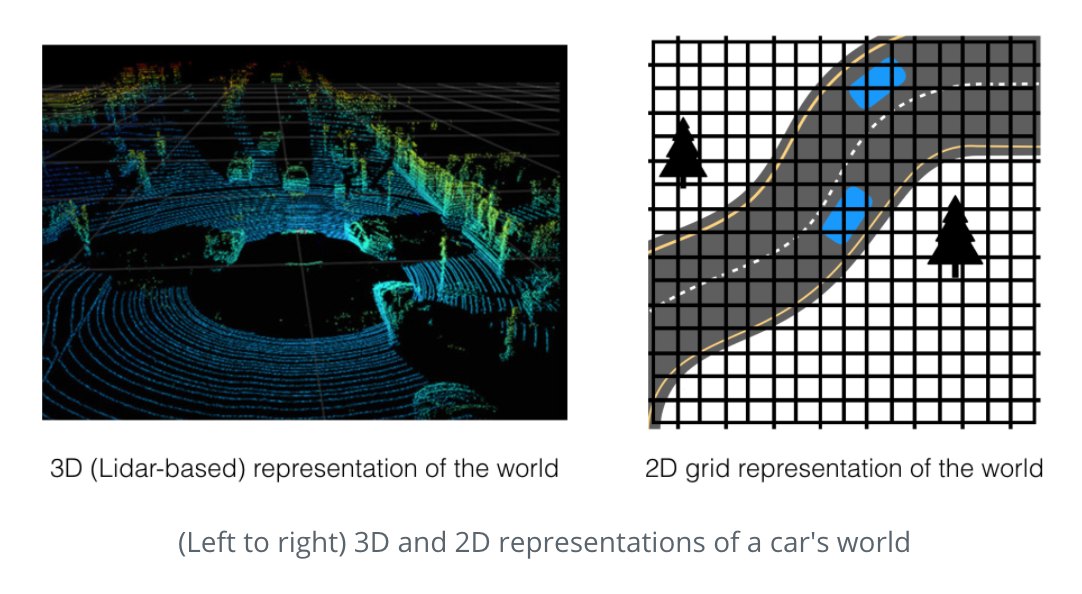

In [5]:
from IPython.display import Image
Image("/Users/mayurjain/Desktop/cv_images/lidar.png")

These grid representations of the environment are known as **discrete** representations. Discrete just means a limited number of places a robot can be (ex. in one grid cell). That's because robots, and autonomous vehicles like self-driving cars, use maps to figure out where they are, and maps lend themselves to being divided up into grids and sections.

You'll see continuous probability distributions when locating objects that are moving around the robot. Continuous means that these objects can be anywhere around the robot and their movement is smooth.

So, let's start with the 1D case.

### Robot World 1-D

First, imagine you have a robot living in a 1-D world. You can think of a 1D world as a one-lane road.

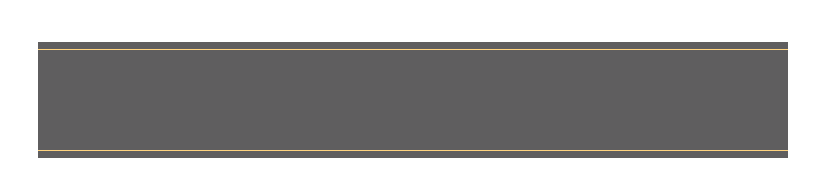

In [6]:
Image("/Users/mayurjain/Desktop/cv_images/road_1.png")

We can treat this road as an array, and break it up into grid cells for a robot to understand. In this case, the road is a 1D grid with 5 different spaces. The robot can only move forwards or backwards. If the robot falls off the grid, it will loop back around to the other side (this is known as a cyclic world).

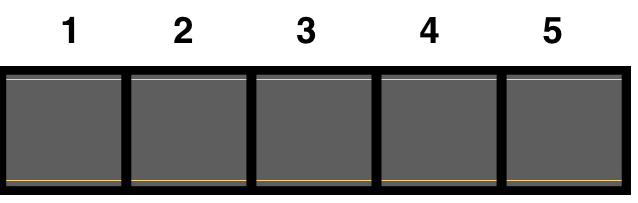

In [7]:
Image("/Users/mayurjain/Desktop/cv_images/numbered_grid.png")

### Uniform Distribution

The robot has a map so that it knows there are only 5 spaces in this 1D world. However, it hasn't sensed anything or moved. For a length of 5 cells (a list of 5 values), what is the probability distribution, p, that the robot is in any one of these locations?

Since the robot does not know where it is at first, the probability of being in any space is the same! This is a probability distribution and so the sum of all these probabilities should be equal to 1, so 1/5 spaces = 0.2. A distribution in which all the probabilities are the same (and we have maximum uncertainty) is called a **uniform distribution.**

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# uniform distribution for 5 grid cells
# we use "p" to represent probability
p = [0.2, 0.2, 0.2, 0.2, 0.2]
print(p)

[0.2, 0.2, 0.2, 0.2, 0.2]


I'll also include a helper function for visualizing this distribution. The below function, display_map will output a bar chart showing the probability that a robot is in each grid space. The y-axis has a range of 0 to 1 for the range of probabilities. For a uniform distribution, this will look like a flat line. You can choose the width of each bar to be <= 1 should you want to space these out.


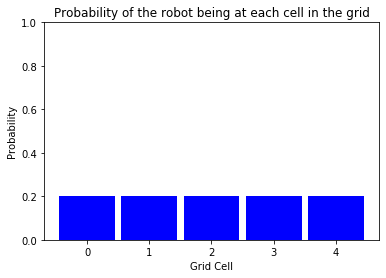

In [10]:
def display_map(grid, bar_width=0.9):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')

# call function on grid, p, from before
display_map(p)

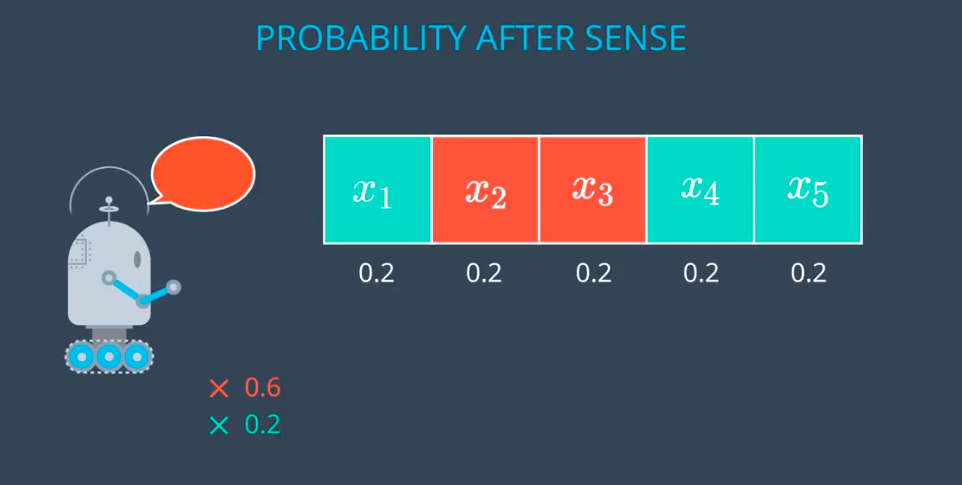

In [11]:
Image("/Users/mayurjain/Desktop/probability_after_sense.png")

### Probability After Sense

When the robot senses that it is in a red cell, and updates its probabilities. As per our example:
Assume, probability that it is sensing the correct color is pHit = 0.6 and probability that it is sensing the incorrect color (in this case: seeing red but actually in a green cell) is pMiss = 0.2

Next, we write code that outputs a new grid, p, after multiplying each entry by pHit or pMiss at the appropriate places.

Remember that the red cells (cell 1 and 2) are "hits" and the other green cells are "misses."
Note that you may see values that are not exact due to how machines imperfectly represent floating points.

In [12]:
pHit = 0.6
pMiss = 0.2
idx_hit = [1,2]
for i,value in enumerate(p):
    if i in idx_hit:
        p[i] = p[i]*pHit
    else:
        p[i] = p[i]*pMiss

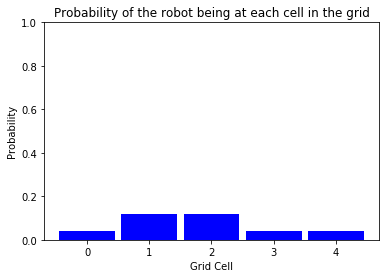

In [13]:
display_map(p)

You should see that the red grid cells (1 and 2) have a higher probability than the green cells. One thing that may look strange is how low these probability bars are, and you may have noticed that these don't accurately represent a probability distribution because the components of this list do not add up to 1!


In [14]:
np.sum(np.array(p)/sum(p))

0.9999999999999998

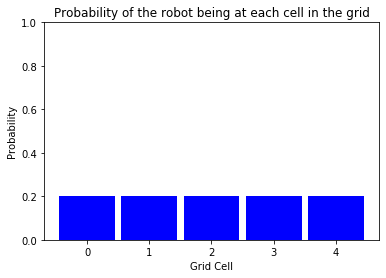

In [15]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
#Z = 'green'
measurements = ['green','red']
pHit = 0.6
pMiss = 0.2

## Complete this function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns an unnormalized distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    
    q=[]
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    q = np.array(q)/sum(q)
    return q

for k in range(len(measurements)):
    p = sense(p, measurements)

#print(np.array(q)/sum(q))
display_map(p)

### Move Function

Now that you know how a robot uses sensor measurements to update its idea of its own location, let's see how we can incorporate motion into this location. In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing, moving and updating that distribution.

We include the sense function that you've seen, which updates an initial distribution based on whether a robot senses a grid color: red or green.

Next, you're tasked with writing a function move that incorporates motion into the distribution. As seen below, one motion U= 1 to the right, causes all values in a distribution to shift one grid cell to the right.

This function should shift a distribution with the motion, U. Keep in mind that this world is cyclic and that if U=0, q should be the same as the given p. You should see all the values in p are moved to the right by 1, for U=1.

In [16]:
(0-1)%5

4

4
0
1
2
3
[0, 0, 1, 0, 0]


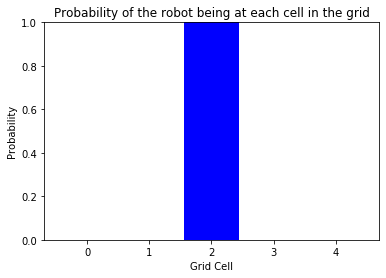

In [20]:
p=[0, 1, 0, 0, 0]
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        # use the modulo operator to find the new location for a p value
        # this finds an index that is shifted by the correct amount
        index = (i-U) % len(p)
        # append the correct value of p to q
        print(index)
        q.append(p[index])
    return q

p_moved = move(p,1)
print(p_moved)
display_map(p_moved)

### Inexact Move Function

Let's see how we can incorporate uncertain motion into our motion update. We include the sense function that you've seen, which updates an initial distribution based on whether a robot senses a grid color: red or green.

Next, you're tasked with modifying the move function so that it incorporates uncertainty in motion.

[0.2000000000000035, 0.2000000000000035, 0.20000000000000365, 0.20000000000000373, 0.20000000000000365]


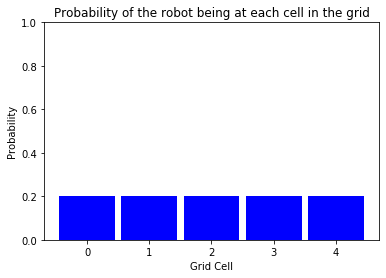

In [23]:
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

# Complete the move function
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        # use the modulo operator to find the new location for a p value
        # this finds an index that is shifted by the correct amount
        index = (i-U) % len(p)
        nextIndex = (index+1) % len(p)
        prevIndex = (index-1) % len(p)
        #print(prevIndex," ",index," ",nextIndex)
        s = pExact * p[index]
        s = s + pOvershoot  * p[nextIndex]
        s = s + pUndershoot * p[prevIndex]
        # append the correct, modified value of p to q
        q.append(s)
    return q

## TODO: try this for U = 2 and see the result
#p = move(p,1)
#p = move(p,1)
for i in range(1000):
    p = move(p,1)
print(p)
display_map(p)

### Sense and Move

In this notebook, we'll see what happens to an initial probability distribution as a robot goes through cycles of sensing then moving then sensing then moving, and so on! Recall that each time a robot senses (in this case a red or green color)it gains information about its environment, and everytime it moves, it loses some information due to motion uncertainty.

[0.11111111 0.33333333 0.33333333 0.11111111 0.11111111]
[0.11111111111111112, 0.1333333333333333, 0.311111111111111, 0.311111111111111, 0.13333333333333333]
[0.15789474 0.06315789 0.14736842 0.44210526 0.18947368]
[0.21157894736842112, 0.1515789473684211, 0.08105263157894739, 0.16842105263157897, 0.3873684210526316]
[0.21157894736842112, 0.1515789473684211, 0.08105263157894739, 0.16842105263157897, 0.3873684210526316]


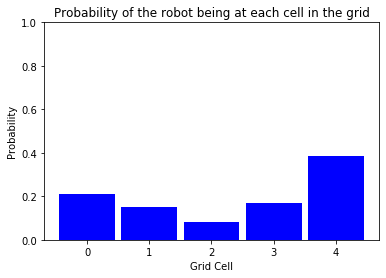

In [26]:
measurements = ["red","green"]
p = [0.2,0.2,0.2,0.2,0.2]
motions = [1,1]

for k in range(len(measurements)):
    # sense and then move, reading the correct measurements/motions at each step
    p = sense(p, measurements[k])
    print(p)
    p = move(p, motions[k])
    print(p)

## print/display that distribution
print(p)
display_map(p)